<a href="https://colab.research.google.com/github/aguilargallardo/Unit_2_Build/blob/master/Rap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPORT

What does The Beatles, Queen, Drake, Post Malone and Halsey have in common? Well, in their own respective genres, they have some amazing hits! Every genre has their own hot hits that continue to be very popular today! But why is that…?  What is it about their songs that are so appealing to people? Maybe figuring out the reasoning as to why some of these songs can be approached through the means of quantitative research.

The Data!
The data I used for my research was found on Kaggle.com, a platform that contains many datasets for people to use to do data science research and machine learning engineering. The dataset was created by Zaheen Hamidani. Hamidani used a spotify API to acquire 232,725 songs all broken down to 26 different genres. Approximately almost nine thousand songs per genre. What is interesting about what Spotify did is that the songs contained different features on the dataset that seem to contain quantitative values. Important feature ranging from liveness of a song to the tempo. It also contains the popularity of a song that ranges from 0-100. 

Machine Learning
Since I have a clean dataset with interesting features I can use machine learning tools to find some usefulness with the dataset! Now what exactly do I want to predict? Popularity of course! Using a RandomForestRegressor I can predict whether or not a song is going to be popular!  At least that is the plan.

Baseline
Lets start off will doing a baseline! I did a linear regression to start off with to see what my baseline score would be.


Random Forest Regressor 
This is my code for my random forest regressor with my hyper parameters! This is what I got.  Pipeline with the random forest regression to the left and my hyper parameters to the right.
I manage to get a much better score. The mean absolute error score was 5.154275965900944, which is a lot lower than 6.4 of our baseline. It doesn’t seem like much before it definitely show less error then just creating a model on a linear regression model.


The Next Step
My predictive  model proves to be quite intriguing. I’m going to continue to do further research and looking into building an interactive dashboard to be deployed as an app for users to predict what makes a song popular in a genre. This can be a potentially useful tool for artists  that are looking into seeing what kind of song they might think of making that have a high chance of being popular. 



## Data Wrangling

In [30]:
!wget "https://raw.githubusercontent.com/aguilargallardo/DS-Unit-2-Applied-Modeling/master/data/SpotifyFeatures.csv"

--2020-01-09 04:01:51--  https://raw.githubusercontent.com/aguilargallardo/DS-Unit-2-Applied-Modeling/master/data/SpotifyFeatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33709086 (32M) [text/plain]
Saving to: ‘SpotifyFeatures.csv.1’

SpotifyFeatures.csv 100%[===================>]  32.15M  45.0MB/s    in 0.7s    

2020-01-09 04:01:54 (45.0 MB/s) - ‘SpotifyFeatures.csv.1’ saved [33709086/33709086]



In [0]:
import pandas as pd
df = pd.read_csv('SpotifyFeatures.csv')

In [32]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [33]:
df.genre.value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [34]:
df.genre.nunique()

27

# RAP

In [0]:
Rap = df[df.genre == 'Rap']

In [36]:
Rap.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
86952,Rap,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.14900,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.55600,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913
86954,Rap,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446
86955,Rap,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.25900,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544


In [0]:
Rap = Rap.sort_values(by='popularity', ascending=False)

In [38]:
Rap.head(20), Rap.shape

(      genre             artist_name  ... time_signature valence
 86951   Rap             Post Malone  ...            4/4   0.385
 86953   Rap             Post Malone  ...            4/4   0.913
 86952   Rap                 J. Cole  ...            4/4   0.463
 86955   Rap               Meek Mill  ...            4/4   0.544
 86954   Rap            Travis Scott  ...            4/4   0.446
 86965   Rap             Post Malone  ...            4/4   0.374
 86961   Rap             Kodak Black  ...            4/4   0.504
 86957   Rap               21 Savage  ...            4/4   0.274
 86956   Rap                Blueface  ...            4/4   0.391
 86958   Rap                Lil Baby  ...            4/4   0.358
 86963   Rap              Juice WRLD  ...            4/4   0.218
 86967   Rap               Sheck Wes  ...            4/4   0.261
 86970   Rap            XXXTENTACION  ...            4/4   0.473
 86960   Rap              Juice WRLD  ...            4/4   0.535
 86962   Rap  A Boogie Wi

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Rap, train_size=.8)

In [0]:
target = 'popularity'
feature = ['acousticness','danceability','duration_ms',
           'energy','instrumentalness','liveness','loudness',
           'speechiness','tempo','valence']

In [0]:
X_train = train[feature]
X_test = test[feature]

y_test = test[target]
y_train = train[target]

## Baseline with Linear Regression

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error Baseline: {mae:.2f}')

Mean Absolute Error Baseline: 6.39


## Random Forest Regressor

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(),
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [44]:
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.3s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


In [0]:
y_pred = pipeline.predict(X_test)

In [46]:
print('Best hyperparameters', search.best_params_)
print('MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 0.1652301427037438, 'randomforestregressor__n_estimators': 441, 'simpleimputer__strategy': 'mean'}
MAE 6.379932815712372


In [47]:
y_pred.shape

(1847,)

In [48]:
X_test.shape

(1847, 10)

In [49]:
X_test

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
119126,0.04580,0.707,126175,0.520,0.000000,0.0967,-7.639,0.1640,160.019,0.369
117548,0.21400,0.523,291280,0.783,0.000000,0.6120,-3.755,0.1850,117.264,0.313
122292,0.12700,0.622,177704,0.777,0.000000,0.1680,-6.084,0.1380,159.923,0.638
87568,0.03300,0.879,189909,0.662,0.000000,0.7160,-6.162,0.3090,117.975,0.723
87769,0.24800,0.916,286907,0.568,0.000000,0.0810,-5.358,0.1300,112.009,0.954
...,...,...,...,...,...,...,...,...,...,...
114550,0.00689,0.717,224933,0.862,0.000000,0.3210,-4.736,0.0540,130.021,0.520
118272,0.08090,0.809,237893,0.744,0.000000,0.2100,-5.892,0.0434,107.990,0.572
115965,0.17900,0.568,258667,0.732,0.000005,0.4010,-4.896,0.1030,186.048,0.626
119882,0.01980,0.667,204840,0.588,0.000003,0.4620,-7.150,0.2660,150.006,0.285


In [50]:
Rap.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.55600,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913
86952,Rap,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.14900,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
86955,Rap,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.25900,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544
86954,Rap,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446


In [0]:
Rap_Artists = Rap.artist_name.unique() 

In [52]:
Rap_Artists
artist_avg = {}

for artist in Rap_Artists:
  x = Rap[Rap.artist_name == artist]
  avg = x.popularity.mean()
  artist_avg[artist] = avg 

artist_avg




{'$tupid Young': 56.5,
 '$uicideBoy$': 61.54794520547945,
 '03 Greedo': 56.0,
 '070 Shake': 60.5,
 '10 Years': 57.75,
 '112': 60.625,
 '1takejay': 53.666666666666664,
 '2 Chainz': 63.97222222222222,
 '2 LIVE CREW': 53.0,
 '21 Savage': 67.42222222222222,
 '22Gz': 52.0,
 '24hrs': 57.333333333333336,
 '27CLUB': 53.0,
 '2Pac': 59.03174603174603,
 '3OH!3': 61.0,
 '50 Cent': 59.23529411764706,
 '6 Dogs': 58.3,
 '6LACK': 65.96296296296296,
 '6ix9ine': 72.92307692307692,
 '6obby': 53.0,
 '88GLAM': 61.23529411764706,
 '916frosty': 54.5,
 '93FEETOFSMOKE': 54.0,
 'A Boogie Wit da Hoodie': 65.21666666666667,
 'A Perfect Circle': 60.25,
 'A Tribe Called Quest': 58.75,
 'A$AP Ferg': 60.8235294117647,
 'A$AP Mob': 57.80769230769231,
 'A$AP Rocky': 63.795918367346935,
 'A$AP Twelvyy': 55.6,
 'ALLBLACK': 52.0,
 'AWOLNATION': 56.0,
 'AZ': 56.0,
 'Ab-Soul': 61.5,
 'Abstract': 59.333333333333336,
 'Ace Hood': 55.333333333333336,
 'Action Bronson': 56.57142857142857,
 'Adam Calhoun': 52.5,
 'Adelitas Way':

In [53]:
#outside func
def get_avg(artist_name):
  return artist_avg[artist_name]

Rap["artist_avg"] = Rap["artist_name"].apply(get_avg)
# LambdaX
# Rap["artist_avg"] = Rap[artist_name].apply(lambda x: return artist_avg[x])


Rap.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_avg
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,75.720930
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.55600,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913,75.720930
86952,Rap,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.14900,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463,65.373333
86955,Rap,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.25900,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544,63.218182
86954,Rap,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446,69.388889


With artist_avg


In [0]:
target = 'popularity'
features = ['acousticness','danceability','duration_ms',
           'energy','instrumentalness','liveness','loudness',
           'speechiness','tempo','valence', 'artist_avg']

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Rap, train_size=.8)

In [0]:
X_train = train[feature]
X_test = test[feature]

y_test = test[target]
y_train = train[target]

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(),
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [0]:
y_pred = pipeline.predict(X_test)

In [59]:
print('Best hyperparameters', search.best_params_)
print('MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 0.1652301427037438, 'randomforestregressor__n_estimators': 441, 'simpleimputer__strategy': 'mean'}
MAE 6.379932815712372


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(),
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [61]:
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.5s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


In [0]:
y_pred = pipeline.predict(X_test)

In [63]:
print('Best hyperparameters', search.best_params_)
print('MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.9686554389449614, 'randomforestregressor__n_estimators': 161, 'simpleimputer__strategy': 'median'}
MAE 5.154275965900944


##Feature Importance

In [0]:

transformers = make_pipeline( 
    SimpleImputer(strategy='median')
)

In [65]:
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [66]:
!pip install eli5

     |████████████████████████████████| 112kB 2.9MB/s 


In [67]:
import eli5
from eli5.sklearn import PermutationImportance

# 1. Calculate permutation importances
permuter = PermutationImportance(
    search,
    scoring="neg_mean_absolute_error",
    n_iter=5,
    random_state=42
)

permuter.fit(X_test_transformed, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomizedSearchCV(cv=3, error_score=nan,
                                                   estimator=Pipeline(memory=None,
                                                                      steps=[('simpleimputer',
                                                                              SimpleImputer(add_indicator=False,
                                                                                            copy=True,
                                                                                            fill_value=None,
                                                                                            missing_values=nan,
                                                                                            strategy='median',
                                                                                            verbose=0)),
                                                            

In [68]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

duration_ms        -0.003000
instrumentalness   -0.000429
energy              0.000804
liveness            0.001357
valence             0.001387
tempo               0.002140
acousticness        0.006423
speechiness         0.009741
danceability        0.018970
loudness            0.044525
artist_avg          2.118740
dtype: float64

In [69]:
# 2. Display permutation importances
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names # must be a list
)

Weight,Feature
2.1187 ± 0.1420,artist_avg
0.0445 ± 0.0174,loudness
0.0190 ± 0.0304,danceability
0.0097 ± 0.0058,speechiness
0.0064 ± 0.0035,acousticness
0.0021 ± 0.0046,tempo
0.0014 ± 0.0011,valence
0.0014 ± 0.0053,liveness
0.0008 ± 0.0066,energy
-0.0004 ± 0.0024,instrumentalness


In [70]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (7385, 11)


In [0]:
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [72]:
features

Index(['acousticness', 'danceability', 'energy', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'artist_avg'],
      dtype='object')

In [73]:
print('Shape after removing features:', X_train.shape)

Shape after removing features: (7385, 9)


In [74]:
X_test = X_test[features]

pipeline = make_pipeline( 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('R2 Scored: ', pipeline.score(X_test, y_test))

R2 Scored:  0.2980892695629823


In [75]:
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


In [76]:
y_pred = pipeline.predict(X_test)
print('Best hyperparameters', search.best_params_)
print('MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.9872744977201601, 'randomforestregressor__n_estimators': 461, 'simpleimputer__strategy': 'mean'}
MAE 5.157113470731829


In [81]:
    !pip install pdpbox
    !pip install shap
    !pip install category_encoders==2.*

     |████████████████████████████████| 102kB 2.3MB/s 


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


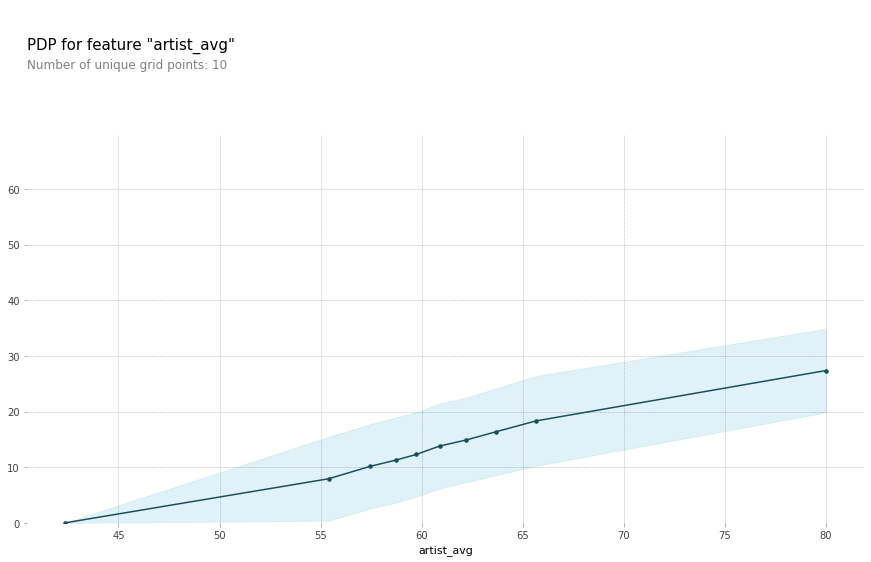

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'artist_avg'
pdp_dist = pdp.pdp_isolate(model=model, dataset=Rap, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);